In [124]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex

## Question 1: Déterminez l’algorithme explicite d’itérations consécutives correspondant à l’équation (3)

On veut isoler $y_{i+1}$. On manipule les équations et on obtient: 

\begin{align}
y_{i+1}=(\frac{2dt^2}{2m+\alpha dt})(-mg+y_i(-k+\frac{2m}{dt^2})+y_{i-1}(\frac{\alpha}{2dt}-\frac{m}{dt^2})) + \mathcal{O}(dt^4)
\end{align}

On pourrait simplifier un peu...

## Question 2: Démontrez comment le membre de droite de l’équation (4) s’obtient à partir du membre du centre

In [ ]:
#Test de la part de JM

## Question 3:

In [99]:
def Simulation(y0, v0, alpha, dt, t_max): 
    """dt est exprimé en valeur de T/pi
        t_max est exprimé en période"""
    
    # Paramètres:
    k=20
    m=50e-3
    g=9.8
    T=2*np.pi*np.sqrt(m/k)
    dt=dt*T/np.pi
    yeq=-m*g/k
    # Calcul de y1
    y1=np.float64(y0*(1-k/2/m*dt**2)+v0*dt*(1-alpha*dt/2/m)-g/2*dt**2)
    
    Position=[y0,y1]
    Temps=[0,dt]
    
    for i in range(int(np.ceil(t_max*T/dt))):
        yi=Position[-1]
        ym1=Position[-2]
        #y(i+1)
        yp1=(yi*(-k+2*m/dt**2)+ym1*(alpha/2/dt-m/dt**2)-m*g)*(m/dt**2+alpha/2/dt)**(-1)

        Temps.append(Temps[-1]+dt)
        Position.append(yp1)
        
    return Temps, Position
    
    
    

    
    

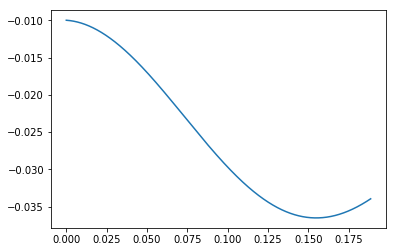

In [185]:
# Test
y0=-1e-2
v0=-1.5e-2
alpha=0.12
dt=1e-4
t_max=0.6
Temps, Position=Simulation(y0, v0, alpha, dt, t_max)
plt.plot(Temps,Position)

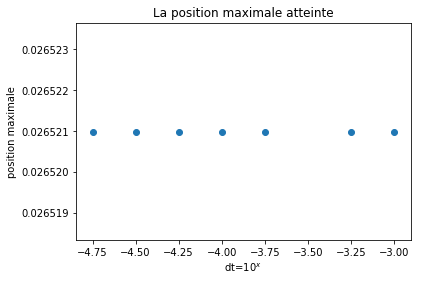

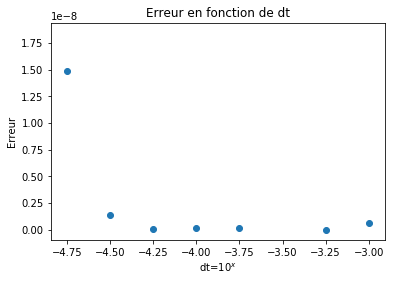

In [214]:
exposant=[-4.75, -4.5, -4.25, -4.0, -3.75,-3.25,-3]
dmax=[]
err=[]
for expo in exposant:
    Temps, Position=Simulation(y0, v0, alpha, 10**expo, 0.6)
    dmax.append(np.max(np.abs(y0-np.array(Position))))
    Temps, Position_dt2=Simulation(y0, v0, alpha, 10**expo/2, 0.6)
    err.append(np.abs(dmax[-1]-np.max(np.abs(y0-np.array(Position_dt2)))))
    
    
plt.scatter(exposant, dmax)
plt.ylim(0.9999*np.min(dmax), 1.0001*np.max(dmax))
plt.title("La position maximale atteinte")
plt.xlabel("dt=$10^x \frac{T}{\pi}$ ")
plt.ylabel("position maximale")
plt.show()

plt.scatter(exposant, err)
plt.ylim(-1e-9, 1.3*np.max(err))
plt.title("Erreur en fonction de dt")
plt.xlabel("dt=$10^x \frac{T}{\pi}$ ")
plt.ylabel("Erreur")
plt.show()


In [216]:
Min_err=np.min(err)
Pos_max_err_min=dmax[np.argwhere(np.equal(err, np.min(err)))[0][0]]
Expo_Err_min=exposant[np.argwhere(np.equal(err, np.min(err)))[0][0]]

Pos_max_err_min
display(Markdown("L'erreur minimale est $\simeq$ {:.1e}".format(Min_err)))
display(Markdown("Elle se produit quand dt= 10**({:})$T/\pi$ sec".format(Expo_Err_min)))
display(Markdown("La position max est alors $d_=${:.10f} cm ".format(Pos_max_err_min*1e2)))

# Il faut ajuster pour les chiffres significatif

L'erreur minimale est $\simeq$ 2.8e-12

Elle se produit quand dt= 10**(-3.25)$T/\pi$ sec

La position max est alors $d_=$2.6520990107 cm 